DATASET DOWNLOAD AND EXTRACT

In [1]:
import numpy as np
import tensorflow as tf
from scipy.io import loadmat
from utility import plot_confusion_matrix
import tensorflow.keras.layers as layer
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [2]:
seed = 1231829
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
from data_loader import get_data
X_data, labels = get_data()

/Users/denisderonjic/Repos/ActivityRecognition/data_loader.py:108: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return (np.array(X_data), labels)


In [4]:
print(X_data.shape)
print(labels.shape)

(761,)
(761,)


FALLING


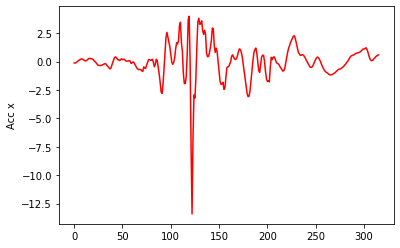

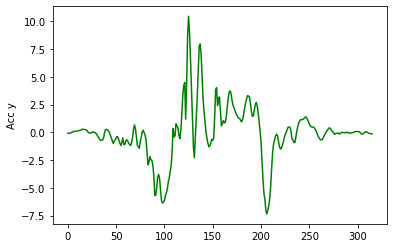

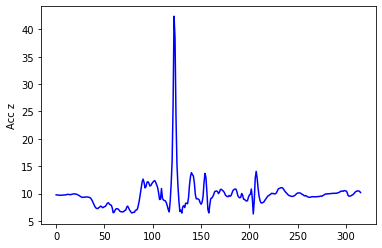

In [5]:
import matplotlib.pyplot as plt

measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [6]:
from data_transformation import frame_data

X_data, y_data = frame_data(X_data, labels)

In [7]:
X_data = X_data[:,:, :6] #Dropping magnetometer

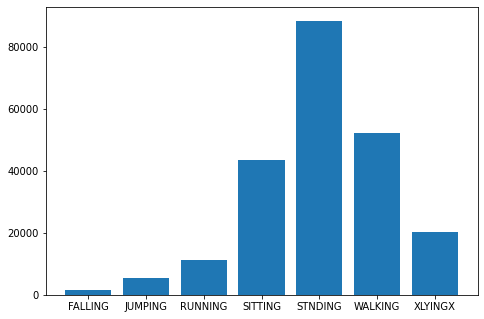

In [8]:
unique, counts = np.unique(y_data, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique,counts)
plt.show()

In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

y_data = le.fit_transform(y_data)

In [10]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

num_labels = len(le_name_mapping)
print(num_labels)

{'FALLING': 0, 'JUMPING': 1, 'RUNNING': 2, 'SITTING': 3, 'STNDING': 4, 'WALKING': 5, 'XLYINGX': 6}
7


In [11]:
X_data_norm = np.linalg.norm(X_data[:,:,0:3], axis=2, keepdims=True)
X_data_fft = np.fft.fft(X_data_norm, axis=1).astype(np.float32)
X_data = np.concatenate([X_data, X_data_fft], axis=-1)

/var/folders/yk/z_nrjlnn1l1d2pdf_3sly5k40000gn/T/ipykernel_7165/2045468286.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  X_data_fft = np.fft.fft(X_data_norm, axis=1).astype(np.float32)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

stratifiedSplit = True

if stratifiedSplit:
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=seed)
    for train_index, test_index in split.split(X_data, y_data):
        X_train.append(X_data[train_index])
        y_train.append(y_data[train_index])
        X_test.append(X_data[test_index])
        y_test.append(y_data[test_index])
    X_train = np.array(X_train[0])
    y_train = np.array(y_train[0])
    X_test = np.array(X_test[0])
    y_test = np.array(y_test[0])
else:
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=seed)

In [13]:
print(X_train.shape)
print(y_train.shape)

(155666, 128, 7)
(155666,)


Text(0.5, 1.0, 'Gyro z')

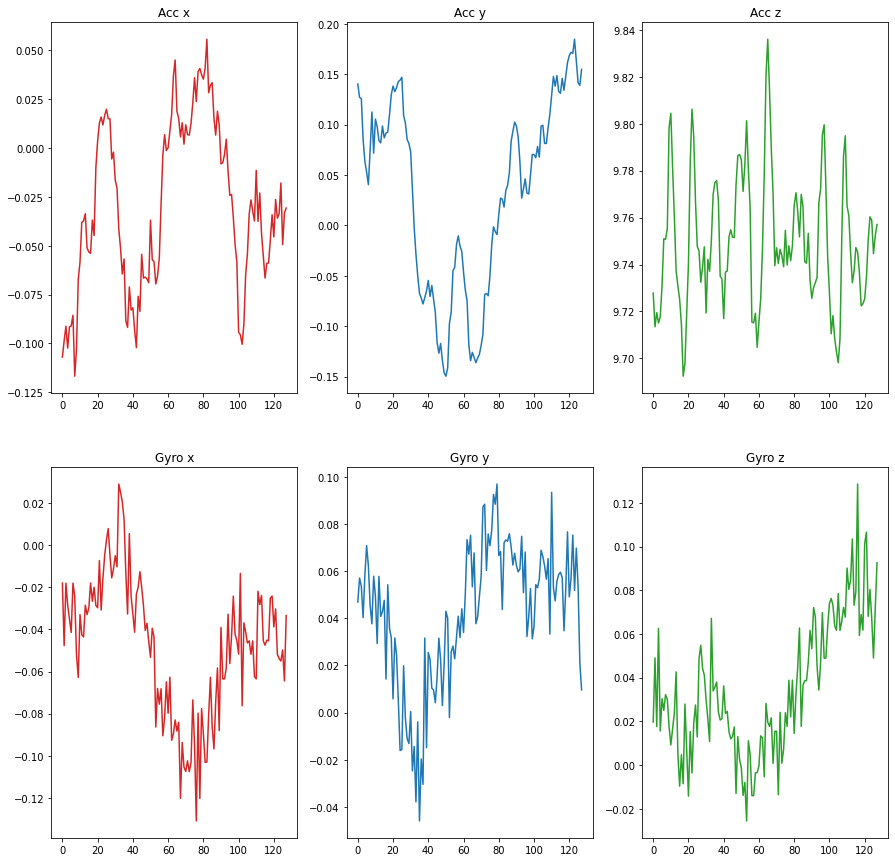

In [14]:
measure = 5
fig, axs = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].plot(X_train[measure,:,0], 'tab:red')
axs[0, 0].set_title('Acc x')
axs[0, 1].plot(X_train[measure,:,1], 'tab:blue')
axs[0, 1].set_title('Acc y')
axs[0, 2].plot(X_train[measure,:,2], 'tab:green')
axs[0, 2].set_title('Acc z')

axs[1, 0].plot(X_train[measure,:,3], 'tab:red')
axs[1, 0].set_title('Gyro x')
axs[1, 1].plot(X_train[measure,:,4], 'tab:blue')
axs[1, 1].set_title('Gyro y')
axs[1, 2].plot(X_train[measure,:,5], 'tab:green')
axs[1, 2].set_title('Gyro z')

In [15]:
from data_transformation import data_normalization
from data_transformation import min_max_scaler

#X_train_fft = np.fft.fft(X_train[:,:,:3], axis=1)
#X_train = np.concatenate([X_train, X_train_fft], axis=-1)
#X_test_fft = np.fft.fft(X_test[:,:,:3], axis=1)
#X_test = np.concatenate([X_test, X_test_fft], axis=-1)
#X_train = np.concatenate([min_max_scaler(X_train[:,:,:3]), min_max_scaler(X_train[:,:,3:]) ], axis=-1)
#X_test = np.concatenate([min_max_scaler(X_test[:,:,:3]), min_max_scaler(X_test[:,:,3:]) ], axis=-1)
X_train = data_normalization(X_train)
X_test = data_normalization(X_test)

2021-09-03 17:28:45.115694: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-03 17:28:45.115845: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [16]:
print(X_train.shape)

(155666, 128, 7)


Text(0.5, 1.0, 'Gyro z')

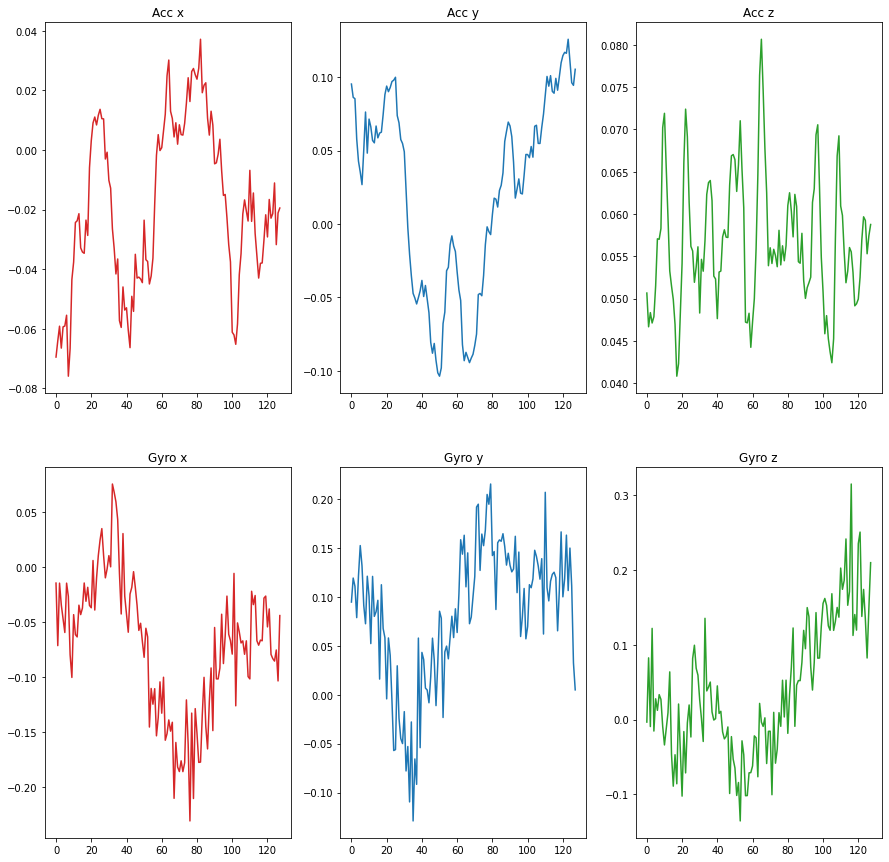

In [17]:
measure = 5
fig, axs = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].plot(X_train[measure,:,0], 'tab:red')
axs[0, 0].set_title('Acc x')
axs[0, 1].plot(X_train[measure,:,1], 'tab:blue')
axs[0, 1].set_title('Acc y')
axs[0, 2].plot(X_train[measure,:,2], 'tab:green')
axs[0, 2].set_title('Acc z')

axs[1, 0].plot(X_train[measure,:,3], 'tab:red')
axs[1, 0].set_title('Gyro x')
axs[1, 1].plot(X_train[measure,:,4], 'tab:blue')
axs[1, 1].set_title('Gyro y')
axs[1, 2].plot(X_train[measure,:,5], 'tab:green')
axs[1, 2].set_title('Gyro z')

In [18]:
from models import Encoder, Decoder

encoded_space_dim = 64
encoder = Encoder(encoded_space_dim)
decoder = Decoder(X_train.shape[-1])
autoencoder = tf.keras.Sequential([encoder, decoder])

autoencoder(X_train[:10]).shape

TensorShape([10, 128, 7])

In [19]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (10, 64)                  287232    
_________________________________________________________________
sequential_1 (Sequential)    (10, 128, 7)              287623    
Total params: 574,855
Trainable params: 574,855
Non-trainable params: 0
_________________________________________________________________


In [20]:
#autoencoder.encoder.summary()

In [21]:
#autoencoder.decoder.summary()

In [22]:
loss_object = tf.keras.losses.MeanSquaredError()

optimizer = tf.keras.optimizers.Adam()

autoencoder.compile(optimizer=optimizer, loss=loss_object)

In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = autoencoder.fit(X_train, X_train,
                epochs=100,
                shuffle=True,
                batch_size=128,
                validation_split=0.2,
                callbacks=[callback]
                )

Epoch 1/100
973/973 [==============================] - 28s 29ms/step - loss: 0.6107 - val_loss: 0.4732
Epoch 2/100
973/973 [==============================] - 29s 30ms/step - loss: 0.4244 - val_loss: 0.3665
Epoch 3/100
973/973 [==============================] - 28s 29ms/step - loss: 0.3440 - val_loss: 0.3110
Epoch 4/100
973/973 [==============================] - 28s 28ms/step - loss: 0.3030 - val_loss: 0.2898
Epoch 5/100
973/973 [==============================] - 28s 29ms/step - loss: 0.2810 - val_loss: 0.2716
Epoch 6/100
973/973 [==============================] - 28s 29ms/step - loss: 0.2650 - val_loss: 0.2543
Epoch 7/100
973/973 [==============================] - 28s 29ms/step - loss: 0.2526 - val_loss: 0.2447
Epoch 8/100
973/973 [==============================] - 28s 29ms/step - loss: 0.2432 - val_loss: 0.2362
Epoch 9/100
973/973 [==============================] - 28s 28ms/step - loss: 0.2346 - val_loss: 0.2318
Epoch 10/100
973/973 [==============================] - 29s 29ms/step - l

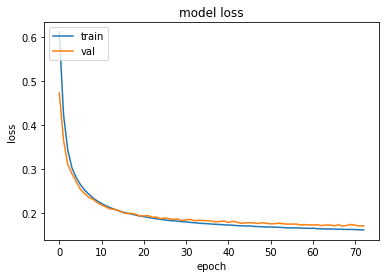

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
X_trans = autoencoder(X_test[:1000])


STNDING


Text(0.5, 1.0, 'Pred Acc 1')

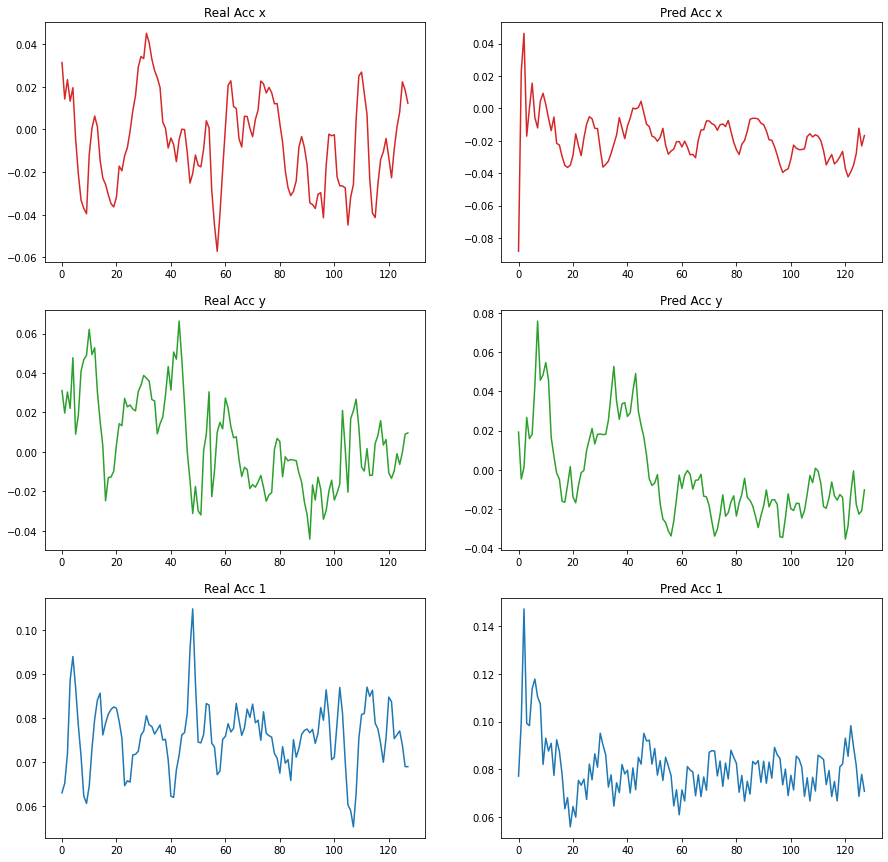

In [ ]:
measure = 719
label_measured = y_train[measure]
print(le.inverse_transform([label_measured])[0])
fig, axs = plt.subplots(3, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
axs[0, 0].plot(X_test[measure,:,0], 'tab:red')
axs[0, 0].set_title('Real Acc x')
axs[0, 1].plot(X_trans[measure,:,0], 'tab:red')
axs[0, 1].set_title('Pred Acc x')

axs[1, 0].plot(X_test[measure,:,1], 'tab:green')
axs[1, 0].set_title('Real Acc y')
axs[1, 1].plot(X_trans[measure,:,1], 'tab:green')
axs[1, 1].set_title('Pred Acc y')

axs[2, 0].plot(X_test[measure,:,2], 'tab:blue')
axs[2, 0].set_title('Real Acc 1')
axs[2, 1].plot(X_trans[measure,:,2], 'tab:blue')
axs[2, 1].set_title('Pred Acc 1')






In [ ]:
### Get the encoded representation of the test samples
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).shuffle(10000).batch(1000)
encoded_samples = []
labels = []
for sample, label in test_dataset:
    output = encoder(sample)
    
    # Append to list
    encoded = output.numpy()
    for i in range(len(encoded)):
      enc = encoded[i]
      lbl = label[i]
      encoded_samples.append(enc)
      labels.append(lbl)
    if len(encoded_samples) % 10000 == 0:
      break
labels = np.array(labels)

In [ ]:
print(np.array(encoded_samples).shape)

(10000, 64)


In [ ]:
from sklearn import manifold
tsne = manifold.TSNE(2, init='pca', random_state=0).fit_transform(encoded_samples)

In [ ]:
labels = le.inverse_transform(labels) 

In [ ]:
import plotly.express as px
px.scatter(x=tsne[:,0], y=tsne[:,1], color=labels, opacity=0.7)

In [ ]:
for l in encoder.layers:
    l.trainable = False
linear =  tf.keras.models.Sequential([layer.Dense(512, activation='relu'), layer.Dense(num_labels, activation='softmax')])
model = tf.keras.models.Sequential([encoder, linear])
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer='adam', loss=loss_function, metrics=['acc'])

In [ ]:
print(X_train.shape)
print(y_train.shape)

(155666, 128, 7)
(155666,)


In [ ]:
history = model.fit(X_train, y_train,
                epochs=10,
                shuffle=True,
                batch_size=64,
                validation_split=0.2)

Epoch 1/10
1946/1946 [==============================] - 9s 4ms/step - loss: 0.7495 - acc: 0.6994 - val_loss: 0.6680 - val_acc: 0.7361
Epoch 2/10
1946/1946 [==============================] - 9s 4ms/step - loss: 0.6535 - acc: 0.7365 - val_loss: 0.6398 - val_acc: 0.7492
Epoch 3/10
1946/1946 [==============================] - 9s 5ms/step - loss: 0.6221 - acc: 0.7519 - val_loss: 0.6428 - val_acc: 0.7457
Epoch 4/10
1946/1946 [==============================] - 9s 5ms/step - loss: 0.5995 - acc: 0.7600 - val_loss: 0.6115 - val_acc: 0.7587
Epoch 5/10
1946/1946 [==============================] - 9s 4ms/step - loss: 0.5850 - acc: 0.7675 - val_loss: 0.6058 - val_acc: 0.7691
Epoch 6/10
1946/1946 [==============================] - 8s 4ms/step - loss: 0.5728 - acc: 0.7710 - val_loss: 0.6013 - val_acc: 0.7689
Epoch 7/10
1946/1946 [==============================] - 9s 4ms/step - loss: 0.5588 - acc: 0.7758 - val_loss: 0.6068 - val_acc: 0.7691
Epoch 8/10
1946/1946 [==============================] - 9s 4ms

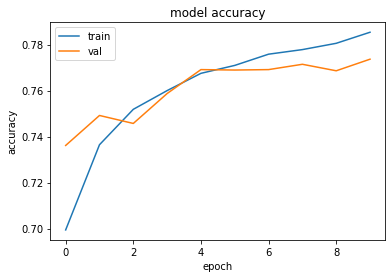

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)

2085/2085 - 3s - loss: 0.5990 - acc: 0.7747


In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
#converter = tf.lite.TFLiteConverter.from_keras_model(model)
#tflite_model = converter.convert()
#with open('model.tflite', 'wb') as f:
#  f.write(tflite_model)

In [ ]:
from sklearn.metrics import precision_score, recall_score

#None, 'micro', 'macro', 'weighted'
precisions = precision_score(y_test, y_pred, average=None)
recalls = recall_score(y_test, y_pred, average=None)
print("Precision score: ", precisions)
print("Recall score: ", recalls)

Precision score:  [0.74796748 0.8305504  0.97727971 0.70862003 0.69192714 0.97546973
 0.49160671]
Recall score:  [0.42890443 0.80419162 0.95614299 0.5696397  0.91216165 0.95607136
 0.06715807]


In [ ]:
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": Precision " + str(precisions[i]) + " Recall " + str(recalls[i]))

FALLING: Precision 0.7479674796747967 Recall 0.4289044289044289
JUMPING: Precision 0.8305504019789735 Recall 0.8041916167664671
RUNNING: Precision 0.9772797052502302 Recall 0.9561429858816461
SITTING: Precision 0.7086200305810397 Recall 0.5696397019282476
STNDING: Precision 0.6919271354628385 Recall 0.9121616527180879
WALKING: Precision 0.9754697286012526 Recall 0.956071360061385
XLYINGX: Precision 0.49160671462829736 Recall 0.06715806715806716


In [ ]:
from sklearn.metrics import f1_score

f1_scores = f1_score(y_test, y_pred, average=None)
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": F1-score " + str(f1_scores[i]))

FALLING: F1-score 0.5451851851851851
JUMPING: F1-score 0.8171585031944023
RUNNING: F1-score 0.9665958092924385
SITTING: F1-score 0.6315744644606278
STNDING: F1-score 0.7869257663224652
WALKING: F1-score 0.9656731359188815
XLYINGX: F1-score 0.11817264735552672


In [ ]:
import matplotlib.cm

def plot_confusion_matrix(predictions, labels, target_names):

  '''
  ============================
  Internal function definition
  ============================
  '''
  def _confusion_matrix(cm,
                            target_names,
                            title='Confusion matrix',
                            cmap=None):
      import itertools

      accuracy = np.trace(cm) / float(np.sum(cm))
      misclass = 1 - accuracy

      if cmap is None:
          cmap = plt.get_cmap('Reds')
      
      cm = cm.astype('float')
      for i in range(len(cm)):
        cm[i] /= float(np.sum(cm[i]))

      plt.figure(figsize=(16, 12))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()

      if target_names is not None:
          tick_marks = np.arange(len(target_names))
          plt.xticks(tick_marks, target_names, rotation=45)
          plt.yticks(tick_marks, target_names)


      thresh = cm.max() / 2
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                      horizontalalignment="center",
                      color="white" if cm[i, j] > thresh else "black")
              


      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
      plt.show()
  '''
  ===================================
  End of internal function definition
  ===================================
  '''

  from sklearn.metrics import confusion_matrix

  conf_mat = confusion_matrix(predictions, labels)
  _confusion_matrix(conf_mat, target_names=target_names)

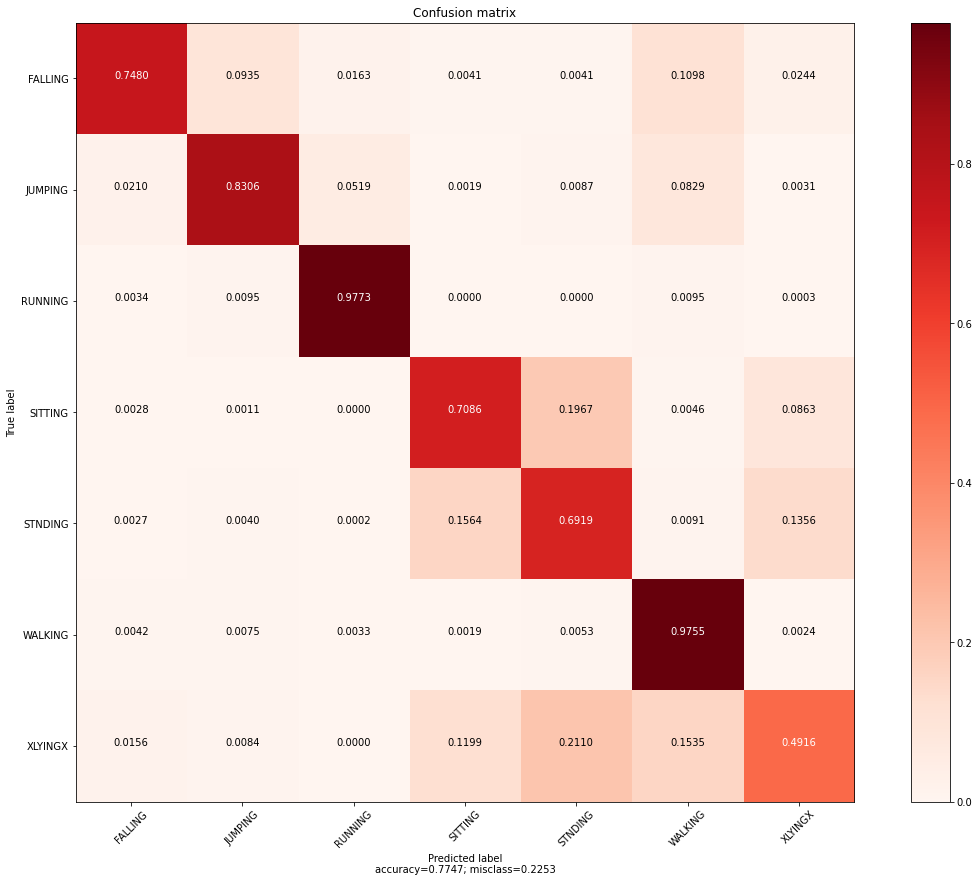

In [ ]:
plot_confusion_matrix(y_pred, y_test, target_names=le.classes_)

In [ ]:
model.save("models/best_autoencoderRawDCT_model.h5")